# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 4 - Parte 2</font>
## <font color='blue'>Modelagem Estatística de Séries Temporais</font>

![title](imagens/Lab4.png)

## Instalando e Carregando os Pacotes

In [4]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
# !pip install -q -U watermark

In [5]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
from matplotlib.pyplot import figure

# Imports para modelagem preditiva
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Imports para métricas e performance do modelo
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Filtrando warnings
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.26.4
pandas     : 2.0.3
matplotlib : 3.8.2
sklearn    : 1.3.2
statsmodels: 0.14.1



## Carregando e Preparando os Dados

In [7]:
# Carrega os dados
dados_treino = pd.read_csv("dados/dataset_treino.csv")
dados_teste = pd.read_csv("dados/dataset_teste.csv")

Vamos ajustar a coluna de data para o tipo adequado.

In [8]:
# Converte a coluna de data para o tipo correto
dados_treino['data'] = pd.to_datetime(dados_treino.data, format = '%d-%m-%Y %H:%M')

In [9]:
# Converte a coluna de data para o tipo correto
dados_teste['data'] = pd.to_datetime(dados_teste.data, format = '%d-%m-%Y %H:%M')

In [10]:
# Definimos o índice do dataset
dados_treino.index = dados_treino['data']

In [11]:
# Removemos a coluna ID, pois ela não é relevante neste caso
dados_treino.drop('id', axis = 1, inplace = True)

In [12]:
# Removemos a coluna data, pois ela não é relevante neste caso
dados_treino.drop('data', axis = 1, inplace = True)

In [13]:
# Variável target 
target = dados_treino['veiculos_produzidos']

In [14]:
# Vejamos como ficou o dataset
dados_treino.head()

,veiculos_produzidos
data,
2020-08-25 00:00:00,8
2020-08-25 01:00:00,2
2020-08-25 02:00:00,6
2020-08-25 03:00:00,2
2020-08-25 04:00:00,2


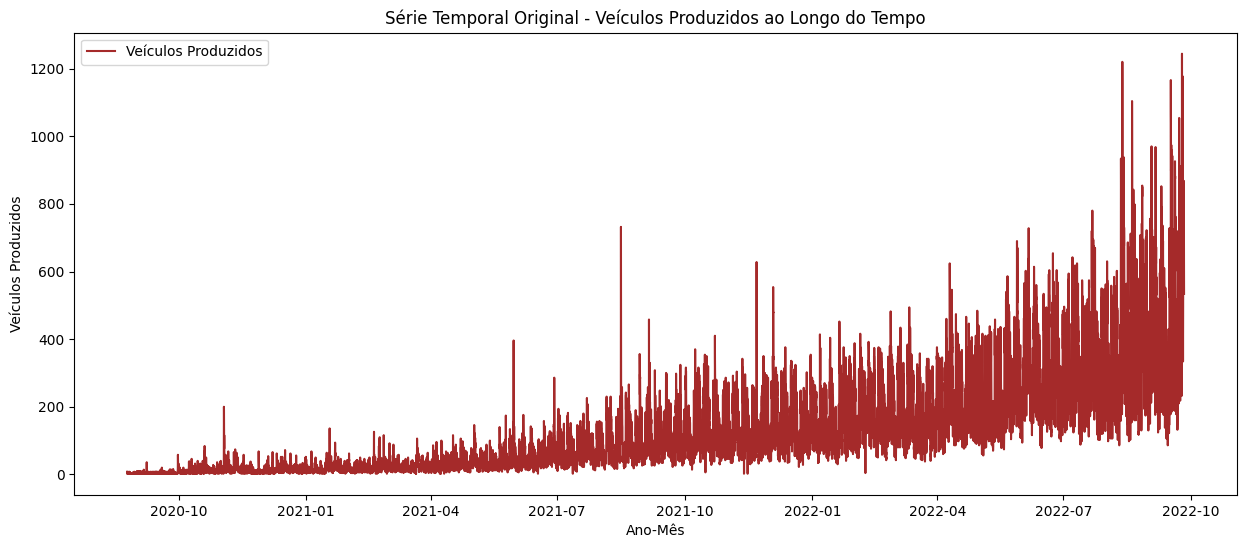

In [15]:
# Plot
figure(figsize = (15, 6))
plt.title("Série Temporal Original - Veículos Produzidos ao Longo do Tempo")
plt.plot(target, label = "Veículos Produzidos", color = 'brown')
plt.xlabel("Ano-Mês")
plt.ylabel("Veículos Produzidos")
plt.legend(loc = "best")

## Pré-Processamento

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

Observe que os registros são separados em ordem cronológica.

In [16]:
# Os dados de treino serão divididos em dados de treino e validação.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

In [17]:
# Os dados devem estar no formato NumPy para o treino do modelo
array_dados_treino = np.asanyarray(df_treino['veiculos_produzidos'])

In [18]:
type(array_dados_treino)

numpy.ndarray

## Forecasting - Modelagem Preditiva Para Séries Temporais

### Implementando a Estratégia 2 de Forecasting - Exponential Smoothing

Exponential Smoothing é uma técnica de modelagem de séries temporais que utiliza uma média móvel ponderada para prever valores futuros de uma série temporal. Cada ponto de dado é atribuído com um peso exponencial decrescente, com os pontos mais recentes recebendo mais peso e os pontos mais antigos recebendo menos peso. O resultado é uma previsão suavizada que leva em consideração tanto a tendência geral quanto a sazonalidade da série temporal.

Vamos criar dois modelos de Suavização Exponencial usando o Statsmodels.

#### Simple Exponential Smoothing

Simple Exponential Smoothing é uma versão simples e popular de Exponential Smoothing que usa apenas um parâmetro ajustável para controlar a influência dos dados passados na previsão. Neste modelo, a previsão para o próximo período é dada pela combinação de uma média móvel ponderada dos valores passados com a última previsão. O peso atribuído a cada ponto de dado é determinado pelo parâmetro ajustável, que pode ser otimizado usando técnicas como otimização por mínimos quadrados. O Simple Exponential Smoothing é fácil de implementar e pode ser usado com sucesso em muitos tipos de séries temporais, mas pode ser insuficiente para lidar com séries temporais com tendências complexas ou sazonalidades fortes.

In [19]:
# Versão 1 do modelo - Simple Exponential Smoothing
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html

# A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy
# A função fit() faz o treinamento

# O hiperparâmetro smoothing_level define o nível de suavização exponencial na série
# O hiperparâmetro optimized define se teremos ou não otimização 

# Versão 1 do modelo - Simple Exponential Smoothing 
modelo_v1 = SimpleExpSmoothing(array_dados_treino).fit(smoothing_level = 0.2, optimized = True)

In [20]:
# Previsões com o Modelo
df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid))

In [21]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid[['veiculos_produzidos', 'previsoes_v1']].head()

,veiculos_produzidos,previsoes_v1
data,,
2022-06-25 02:00:00,218,395.388938
2022-06-25 03:00:00,244,395.388938
2022-06-25 04:00:00,168,395.388938
2022-06-25 05:00:00,140,395.388938
2022-06-25 06:00:00,156,395.388938


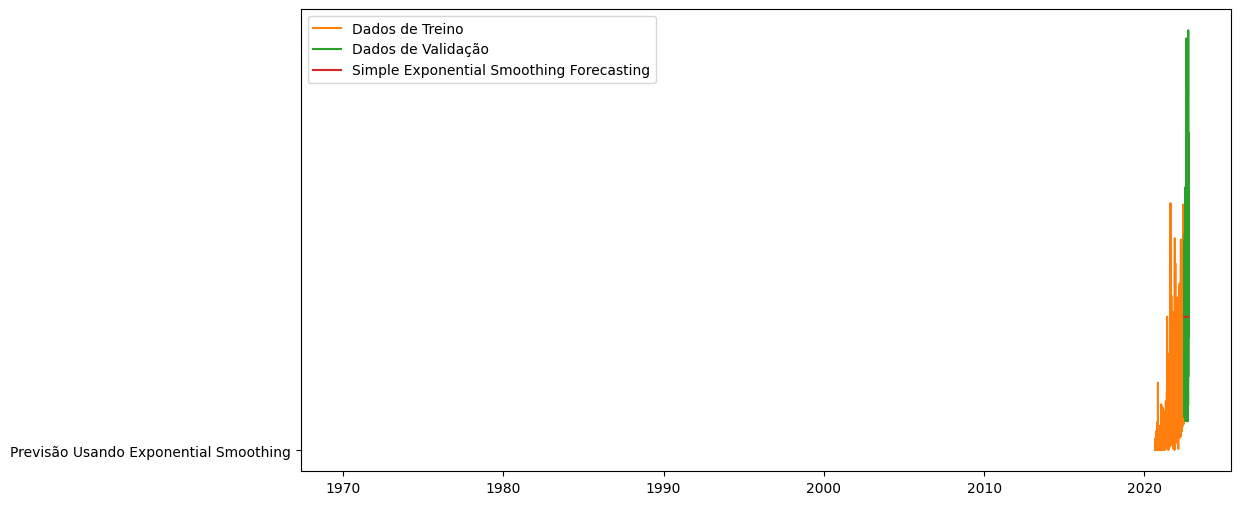

In [22]:
# Plot
figure(figsize = (12, 6))
plt.plot("Previsão Usando Exponential Smoothing")
plt.plot(df_treino['veiculos_produzidos'], label = 'Dados de Treino')
plt.plot(df_valid['veiculos_produzidos'], label = 'Dados de Validação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting')
plt.legend(loc = 'best')
plt.show()

Visualmente não parece ter tanta diferença para nosso modelo base do Projeto. Vamos calcular o erro do modelo.

In [23]:
# Define valor real e valor previsto
y_true = df_valid.veiculos_produzidos
y_pred = df_valid.previsoes_v1

In [24]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred))
print(metrica_rmse)

186.52867297329848


Nosso modelo base com o Método Naive obteve um RMSE de 195.06. Reduzimos o erro para 186.53. Ou seja, já temos uma forma de fazer previsões um pouco melhores.

Nosso objetivo é reduzir o RMSE tanto quanto possível, pois essa métrica indica a taxa de erro do modelo.

Será que conseguimos melhorar a performance do modelo preditivo? Vamos tentar outro tipo de suavização exponencial.

#### Double Exponential Smoothing 

Double Exponential Smoothing é uma técnica de modelagem de séries temporais que combina elementos de Simple Exponential Smoothing com uma previsão da tendência da série temporal. Além do parâmetro ajustável que controla a influência dos dados passados na previsão, o Double Exponential Smoothing também inclui um segundo parâmetro ajustável que controla a influência da tendência na previsão. A previsão para o próximo período é dada pela combinação da última previsão, da última tendência estimada e da última observação. O Double Exponential Smoothing é mais robusto do que o Simple Exponential Smoothing e é capaz de lidar com séries temporais com tendências complexas ou sazonalidades fortes.

In [25]:
# Versão 2 do modelo - Double Exponential Smoothing 
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html

# Observe que estamos usando a função ExponentialSmoothing().
# Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.
# Ao usar o hiperparâmetro seasonal, definimos o método Triple Exponential Smoothing.

# Vamos usar o Double. Como não temos sazonalidade na série, não faz muito sentido usar o Triple.
# Escolhi a série aditiva
modelo_v2 = ExponentialSmoothing(np.asanyarray(df_treino['veiculos_produzidos']),
                                 trend = 'additive').fit(smoothing_level = 0.9,
                                                         optimized = True)

In [26]:
# Previsões com o Modelo
df_valid.loc[:, 'previsoes_v2'] = modelo_v2.forecast(len(df_valid))

In [27]:
# Colocamos lado a lado, valor real e valor "previsto"
df_valid[['veiculos_produzidos', 'previsoes_v1', 'previsoes_v2']].head()

,veiculos_produzidos,previsoes_v1,previsoes_v2
data,,,
2022-06-25 02:00:00,218,395.388938,337.596236
2022-06-25 03:00:00,244,395.388938,337.681882
2022-06-25 04:00:00,168,395.388938,337.767528
2022-06-25 05:00:00,140,395.388938,337.853174
2022-06-25 06:00:00,156,395.388938,337.938820


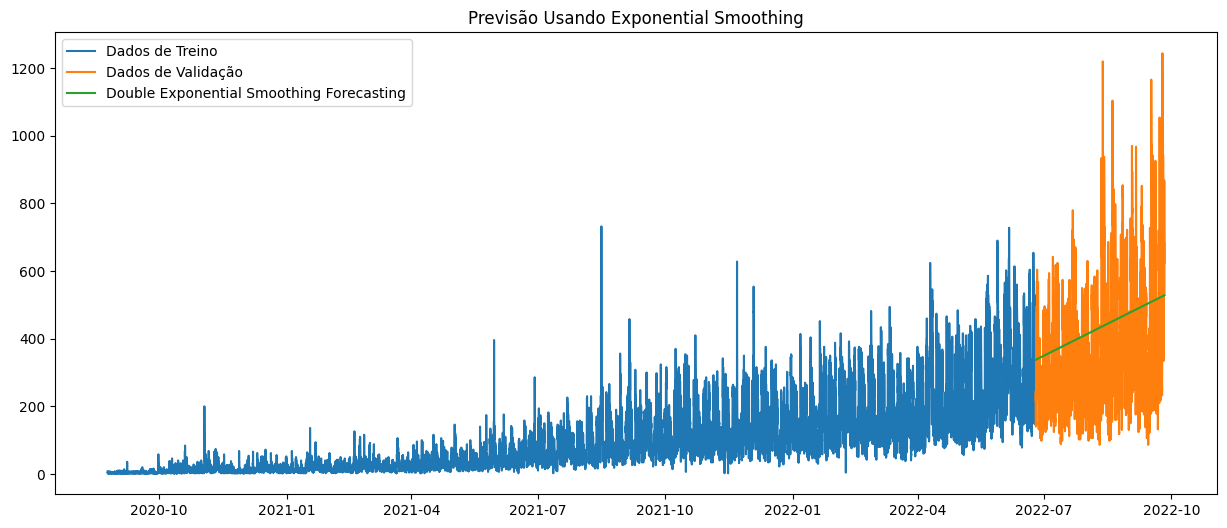

In [30]:
# Plot
figure(figsize = (15, 6))
plt.title("Previsão Usando Exponential Smoothing")
plt.plot(df_treino['veiculos_produzidos'], label = 'Dados de Treino')
plt.plot(df_valid['veiculos_produzidos'], label = 'Dados de Validação')
plt.plot(df_valid['previsoes_v2'], label = 'Double Exponential Smoothing Forecasting')
plt.legend(loc = 'best')
plt.show()

In [31]:
# Define valor real e valor previsto
y_true = df_valid.veiculos_produzidos
y_pred = df_valid.previsoes_v2

In [32]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred))
print(metrica_rmse)

182.55380116320066


Conseguimos um ganho um pouco mais efetivo. A linha de previsão mudou, seguindo um pouco mais o padrão nos dados, e o erro do modelo caiu um pouco mais.

Ainda assim as técnias de suavização apresentaram um resultado apenas levemente superior ao modelo base. Vamos tentar melhorar isso com modelos ARIMA.

Não usamos ainda os dados de teste. Usaremos com a melhor versão do modelo.

# Fim